In [ ]:
import tensorflow as tf

w = tf.Variable(2.)
def f(w):
  y = w**2
  z = 2*y + 5
  return z


with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)
# 2w**2+b

#가설 함수
w = tf.Variable(4.0)
b = tf.Variable(1.0)

@tf.function
def hypothesis(x):
  return w*x+b

x_test = [3.5, 5, 5.5, 6]

print(hypothesis(x_test).numpy())

#손실 함수
@tf.function
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y))

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

optimizer = tf.optimizers.SGD(0.01)



In [ ]:
for i in range(301):
  
  with tf.GradientTape() as tape:
    y_pred = hypothesis(x)
    cost = mse_loss(y_pred, y)
    # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [w,b])
    
  optimizer.apply_gradients(zip(gradients, [w,b]))
  if i % 10 == 0:
    print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

In [ ]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

model.add(Dense(1, input_dim=1, activation="linear"))
sgd = optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse']) #평균제곱

model.fit(x, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 76ms/step - loss: 4563.4824 - mse: 4563.4824
Epoch 2/300
1/1 [==============================] - 0s 1ms/step - loss: 562.6353 - mse: 562.6353
Epoch 3/300
1/1 [==============================] - 0s 2ms/step - loss: 70.3595 - mse: 70.3595
Epoch 4/300
1/1 [==============================] - 0s 1ms/step - loss: 9.7870 - mse: 9.7870
Epoch 5/300
1/1 [==============================] - 0s 1ms/step - loss: 2.3324 - mse: 2.3324
Epoch 6/300
1/1 [==============================] - 0s 2ms/step - loss: 1.4135 - mse: 1.4135
Epoch 7/300
1/1 [==============================] - 0s 2ms/step - loss: 1.2988 - mse: 1.2988
Epoch 8/300
1/1 [==============================] - 0s 1ms/step - loss: 1.2831 - mse: 1.2831
Epoch 9/300
1/1 [==============================] - 0s 2ms/step - loss: 1.2796 - mse: 1.2796
Epoch 10/300
1/1 [==============================] - 0s 2ms/step - loss: 1.2776 - mse: 1.2776
Epoch 11/300
1/1 [==============================] - 0s 1ms/step - 

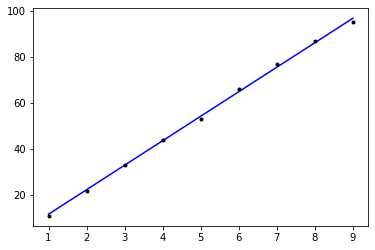

In [23]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')
plt.show()

In [29]:
print(model.predict([9.3]))

[[100.01384]]
